In [1]:
# critical
import argparse
import os
import random
import time
import math

# data
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# signal processing
from scipy import signal
from scipy.stats import entropy

In [3]:
# set random seed for reproducibility
manualSeed = 99
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)

np.random.seed(manualSeed)

Random Seed:  99


In [12]:
generated_signals_df = pd.read_csv('../data/output/generated_signals_10000.csv', header=None)

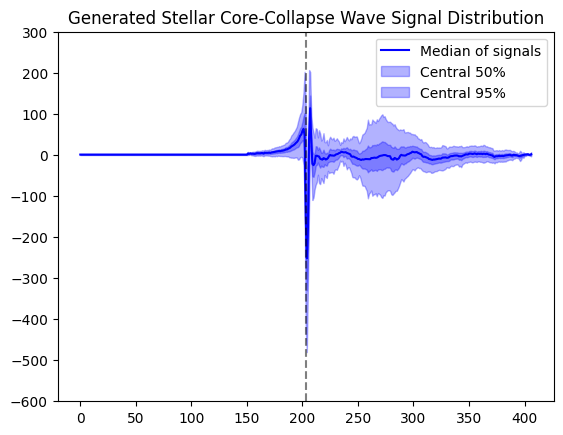

In [15]:
# Compute median of signals
median_line = generated_signals_df.median(axis=1)
plt.plot(median_line.index, median_line.values, 'b-', label='Median of signals')

# Compute central 50% interval
percentile_25 = generated_signals_df.quantile(0.25, axis=1)
percentile_75 = generated_signals_df.quantile(0.75, axis=1)
plt.fill_between(median_line.index, percentile_25, percentile_75, color='blue', alpha=0.3, label='Central 50%')

# Compute central 95% interval
percentile_2_5 = generated_signals_df.quantile(0.025, axis=1)
percentile_97_5 = generated_signals_df.quantile(0.975, axis=1)
plt.fill_between(median_line.index, percentile_2_5, percentile_97_5, color='blue', alpha=0.3, label='Central 95%')

# The core bounce is at n = 203
plt.axvline(x=203, color='black', linestyle='--', alpha=0.5)  
plt.ylim(-600, 300)

plt.title('Generated Stellar Core-Collapse Wave Signal Distribution')
plt.legend()
plt.savefig('../plots/generated_signal_distribution.png')
plt.show()